# Foundation of Predictive Analytics
By Xiong Peng and Eli Yi-Liang Tung 

Department of Analytics and Operations, Business School, NUS



### Learning Objectives
1. Explore discrete and continuous random variables and their distributions such as probability mass function and cumulative distribution function using SciPy
2. Describe populations and samples in statistics
3. Understand sampling distribution from a population
4. Simulation of random variables for decision analysis using SciPy

## Imports <a id="section1"></a>
Besides the usual Python packages we used before, this document requires an extra package [<code>ipywidets</code>](https://ipywidgets.readthedocs.io/en/latest/) to create interactive widgets. Detailed steps of installing the package is given [here](https://ipywidgets.readthedocs.io/en/latest/user_install.html), where you may first try "with conda". It is recommended to disable "Toggle scrolling" by "Cell->Current Output->Toggle Scrolling" for a better looking. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ipywidgets as widgets
from scipy.stats import binom
from scipy.stats import norm

### Review of Probability Theory

#### Properties of expected values and variances
Let $X$ be an arbitrary random variable, and $a$ and $c$ are two constants, then we have
- $\mathbb{E}(c) = c$;
- $\mathbb{E}(aX+c) = a\mathbb{E}(X) + c$.

If $\{a_1, a_2, ..., a_n\}$ is a sequence of constants, and $\{X_1, X_2, ..., X_n\}$ is a sequence of random variables, then we have
- $\mathbb{E}\left(\sum\limits_{i=1}^na_iX_i\right) = \sum\limits_{i=1}^na_i\mathbb{E}(X_i)$

As a special case that each $a_i=1$, then the equation above can be written as $\mathbb{E}\left(\sum_{i=1}^nX_i\right)=\sum_{i=1}^n\mathbb{E}(X_i)$.

Let $X$ and $Y$ be two random variables, and $a$, $b$, and $c$ are three constants, then we have
- $\text{Var}(c) = 0$;
- $\text{Var}(aX+c) = a^2\text{Var}(X)$;
- $\text{Var}(aX+bY+c) = a^2\text{Var}(X) + b^2\text{Var}(Y) + 2ab\text{Cov}(X, Y)$.

In a special case that $X$ and $Y$ are uncorrelated, the covariance between $X$ and $Y$ is zero, so the last equation can be written as $\text{Var}(aX+bY+c) = a^2\text{Var}(X) + b^2\text{Var}(Y)$. Such a result can be extend to the following case
- $\text{Var}\left(\sum\limits_{i=1}^na_iX_i\right) = \sum\limits_{i=1}^na_i^2\text{Var}(X_i)$,

where $\{a_1, a_2, ..., a_n\}$ is a sequence of constants, and $\{X_1, X_2, ..., X_n\}$ is a sequence of **pairwise uncorrelated** random variables. 

#### Discrete random variables and their distributions
A random variable $X$ is defined to be **discrete** if its possible outcomes are finite or countable. A few examples are given below.
1. The result of rolling a dice (discrete uniform distribution)
2. The preference of one customer for Coke or Pepsi (Bernoulli distribution)
3. Among 10 customers, the number of people who prefer Coke over Pepsi (Binomial distribution) 
4. The number of patients arriving in an emergency room within a fixed time interval (Poisson distribution)

<div class="alert alert-block alert-danger">
    <b>Notes: </b> For a discrete random variable $X$ with $k$ possible outcomes $x_j$, the <b>probability mass function (PMF)</b> is given by:
    \begin{align}
    P(X=x_j) = p_j, \text{   for each }j=1, 2, ..., k,
    \end{align}
where $p_j$ is the probability of the outcome $x_j$, and all $p_i$ must satisfy 
    \begin{cases}
    0\leq p_i \leq 1 \\
    \sum_{j=1}^kp_j = 1
    \end{cases}
</div>

<div class="alert alert-block alert-success">
<b>Example :</b> Suppose that in Singapore, $65\%$ of customers prefer Coke, while the remaining $35\%$ prefer Pepsi. Now we randomly survey 10 customers, among which the number of customers who prefer Coke is denoted by a discrete random variable $X$. Plot the PMF of $X$. 
</div>

[ 0  1  2  3  4  5  6  7  8  9 10]


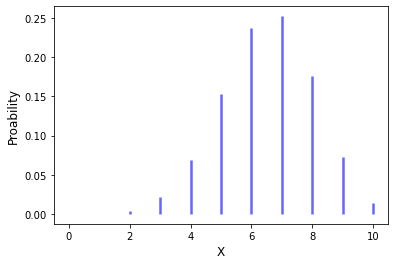

In [5]:
n = 10                                          # Number of customers 
p = 0.65                                        # Propability of choosing Coke
x = np.arange(n+1)                              # All possible values of X
pmf = binom.pmf(x, n, p)                        # The PMF of the random variable X

plt.vlines(x, ymin=0, ymax=pmf, linewidth=2.5, 
           colors='b', alpha=0.6)               # Plot vertical lines

plt.xlabel('X', fontsize=12)
plt.ylabel('Proability', fontsize=12)
print(x)
plt.show()

<div class="alert alert-block alert-danger">
    <b>Notes: </b> The <b>cumulative distribution function (CDF)</b> of a random variable $X$ is defined as 
    \begin{align}
    F(x) = P(X\leq x).
    \end{align}
</div>

<div class="alert alert-block alert-success">
<b>Example:</b> Plot the CDF of the random variable $X$ described. 
</div>

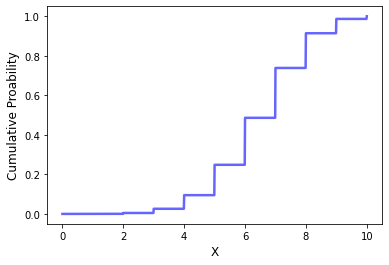

In [3]:
n = 10                                  # Number of customers                          
p = 0.65                                # Probability of choosing Coke
step = 0.01
x = np.arange(0, n+step, step)          # Continous values of X
cdf = binom.cdf(x, n, p)                # The CDF of the random variable X

plt.plot(x, cdf, linewidth=2.5, 
         c='b', alpha=0.6)              # Plot the curve for the CDF

plt.xlabel('X', fontsize=12)
plt.ylabel('Cumulative Proability', 
           fontsize=12)                 
plt.show()

#### Continuous random variables and their distributions
A variable $X$ is a **continuous random variable** if it takes on any real value with *zero* probability. Random variables following uniform, normal (Gaussian) and exponential distributions are all continuous variables.  

For continuous random variables, there is no PMF as the discrete random variables, because $P(X=x)=0$ for all values of $x$. The CDF for a continuous random variable has the same definition as the discrete case, which is $F(x)=P(X\leq x)$. Based on the CDF, we have other definitions listed as follows.

<div class="alert alert-block alert-danger">
    <b>Notes: </b> Let $F(x)$ be the CDF of a continuous random variable $X$, then
    <li> The derivative $f(x) = \frac{\text{d} F(x)}{\text{d}x}$ of the CDF $F(x)$ is called the <b>probability density function (PDF)</b> of $X$. This definition also implies that $F(x) = \int_{-\infty}^{x}f(t)dt$ 
    <li> The inverse of CDF $F(x)$, denoted by $F^{-1}(q)$, is called the <b>Percent Point Function (PPF)</b>, where $q$ is the given cumulative probability. This function is sometimes referred to as the <b>inverse distribution function</b> or the <b>quantile function</b>.
</div>

We are using a standard normal distribution as an example to illustrate the definition of CDF, PDF, and PPF. You are encouraged to play with the chart below to better understand the geometric interpretation of these functions.

In [4]:
""" 
The purpose of this code cell is to show the geometric 
interpretation of PDF, CDF, and PPF. 

You are not required to understand the code.
"""

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from scipy.stats import norm

def update_x(x):
    """Function for updating the chart with the new X value """
    
    xs = np.arange(-3.5, 3.51, 0.01)
    ys = norm.pdf(xs)
    x_cdf = np.arange(-3.5, x+0.01, 0.01)
    y_cdf = norm.pdf(x_cdf) 
    x_conn = x
    
    plt.figure(figsize=(6, 3.5))
    plt.plot(xs, ys, linewidth=3, c='k', alpha=0.4, label='Density curve')
    plt.fill_between(x_cdf, y_cdf, color='b', alpha=0.4, 
                     label='Cumulative probability')
    plt.scatter(x, 0, c='r', s=80, alpha=0.5)
    
    plt.plot([x_conn, 3], [0.5*norm.pdf(x_conn), 0.35], 
             c='b', linewidth=2.5, alpha=0.4)
    plt.plot([max(-3.8, x-0.8), x-0.01], 
             [norm.pdf(x), norm.pdf(x)], 
             c='k', linewidth=2.5, alpha=0.5)
    
    plt.text(x+0.2, -0.03, '$X=$' + '{0:4.2f}'.format(x), c='r', fontsize=11)
    plt.text(1.5, 0.36, 
             '$P(X\leq$' + '{0:5.2f}'.format(x) + '$)=$' + 
             '{0:0.3f}'.format(norm.cdf(x)), 
             c='b', fontsize=11)
    plt.text(max(-5, x-2), norm.pdf(x)-0.01, '{0:0.3f}'.format(norm.pdf(x)), 
             fontsize=12)
    tx = 'norm.pdf({0:6.3f}, loc=0, scale=1)'.format(x)
    tx += ' = {0:6.3f}\n'.format(norm.pdf(x))
    tx += 'norm.cdf({0:6.3f}, loc=0, scale=1)'.format(x)
    tx += ' = {0:6.3f}\n'.format(norm.cdf(x))
    tx += 'norm.ppf({0:6.3f}, loc=0, scale=1)'.format(norm.cdf(x))
    tx += ' = {0:6.3f}'.format(x)
    attr = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
    plt.text(-5, -0.32, tx, fontsize=15, bbox=attr)
    
    plt.xlabel('Random variable $X$', fontsize=12)
    plt.ylabel('Probability density function', fontsize=12)
    plt.ylim([-0.04, 0.58])
    plt.xlim([-5.2, 5.2])
    plt.legend(fontsize=12, loc='upper left')
    plt.grid()
    plt.show()
    
x_sld = widgets.FloatSlider(value=-1, min=-3.5, max=3.5, step=0.01,
                            description='Value of $X$: ', disabled=False,
                            continuous_update=False,
                            orientation='horizontal',
                            readout=True, readout_format='.2f')
ui = widgets.HBox([x_sld])
out = widgets.interactive_output(update_x, {'x': x_sld})
display(ui, out)

Output()

In [5]:
norm.ppf(0.3, loc=0, scale=1)

-0.5244005127080409

Another important property of the CDF is given below.

<div class="alert alert-block alert-danger">
    <b>Notes: </b> For a random variable and given values $x_1 \leq x_2$ ($x_1 < x_2$ for discrete variables), then the probability 
    \begin{align}
    P(x_1 \leq X \leq x_2) = P(X \leq x_2) - P(X \leq x_1) = F(x_2) - F(x_1).
    \end{align}
</div>

As a special case of continuous variables, if $x=x_1=x_2$, then we can prove that 
\begin{align}
P(X=x) = P(x\leq X \leq x) = F(x) - F(x) = 0.
\end{align}

#### The <code>scipy.stats</code> module and distribution objects
The [<code>scipy.stats</code>](https://docs.scipy.org/doc/scipy/reference/stats.html) module provides many Python objects for commonly used probability distributions, such as <code>binom</code> for binomial distributions and <code>norm</code> for normal distributions. The general syntax of calling these methods of distribution objects from the <code>scipy.stats</code> module is given as follows.

<center><b><code>object.method(<font color='blue'><i>variable</i></font>, <font color='blue'><i>distr_param_1</i></font>, <font color='blue'><i>distr_param_2</i></font>, ... )</code></b></center>

- <b><code>object</code></b> is the object of a specific type of distribution, such as <code>binom</code> for binomial and <code>norm</code> for normal distributions; 
- <b><code>method</code></b> specifies the distributional function, such as <code>pdf</code> for PDF, <code>pmf</code> for PMF, <code>cdf</code> for CDF, and <code>ppf</code> for PMF;
- <b><code><font color='blue'><i>variable</i></font></code></b> is the variable of the distributional function <b><code>method</code></b>;
- <b><code><font color='blue'><i>distr_param_1</i></font></code></b>, <b><code><font color='blue'><i>distr_param_2</i></font></code></b>, ... are the parameters specifying the shape of the distribution, such as the mean and the standard deviation specify the shape of a normal distribution. 

<div class="alert alert-block alert-success">
<b>Extra Example:</b> Suppose that in Singapore, $65\%$ of customers prefer Coke, while the remaining $35\%$ prefer Pepsi. Now we randomly survey 10 customers, what is the probability that the majority of them select Coke?
</div>

In [6]:
p_coke = 1 - binom.cdf(5, n=10, p=0.65)
print('{0:0.3f}'.format(p_coke))

0.751


Please note that the first argument <b><code><font color='blue'><i>variable</i></font></code></b> can be an array or other compound data types.

<div class="alert alert-block alert-success">
<b>Extra Example:</b> Calculate the 99.5th percentile of a standard normal distribution.
</div>

In [7]:
x = norm.ppf(0.995, loc=0, scale=1)
print('{0:0.3f}'.format(x))

2.576


The method <code>norm.ppf()</code> takes <code>loc=0</code> and <code>scale=1</code> as the default argument values, so we can leave these two argument unspecified for standard normal distribution. The code above can be thus simplified as follows.

In [8]:
x = norm.ppf(0.995)
print('{0:0.3f}'.format(x))

2.576


### Samples and populations <a id="subsection3.2"></a>

<div class="alert alert-block alert-success">
<b>Example:</b> The lifespans of all bulbs in a batch are recorded in a file called "bulb.csv". What is the mean lifespan of bulbs in this batch?
</div>

In [6]:
data_bulb = pd.read_csv('bulb.csv')
data_bulb.head()

FileNotFoundError: [Errno 2] File bulb.csv does not exist: 'bulb.csv'

In [ ]:
print(data_bulb.shape)

It is easy to find the mean lifespan by the following code.

In [ ]:
mean_value = data_bulb['Lifespan'].mean()
print('Population mean: {0:0.2f}'.format(mean_value))

In this example, the whole batch is a **population** that we are interested in, and it is easy to obtain the population mean and other information using simple Python functions. However, in real applications, it is impractical to burn out all bulbs to find their lifespans. Instead, it is more economical to estimate the mean value via testing a **sample** that contains a small fraction of the overall population. The terms **population** and **sample** in statistics are thus generalized as follows.

<div class="alert alert-block alert-danger">
    <b>Notes:</b>  
        <li> <b>Population</b>: The collection of all individuals or items under consideration in a statistical study.
        <li> <b>Sample</b>: A part of the population from which information is obtained.
</div>

We provide two other examples below for your reference.
1. A study on the percentage of US voters who support Trump in the 2020 election 
    - **Population**: all US voters
    - **Sample**: a poll of 1000 voters
2. A study on the average household income of all Singaporeans 
    - **Population**: all households in Singapore
    - **Sample**: a survey of 100 households in Singapore
    
<img src="https://s3-eu-west-1.amazonaws.com/blog.omniconvert.com-media/blog/wp-content/uploads/2019/10/21150245/sample-size-definition.png" width=450px>

Although it is less costly and more practical to obtain the sample data, we cannot expect the sample yield perfectly accurate information about the population. For instance, we consider a sample with $n=25$ randomly selected bulbs from the batch, and the following code calculates the sample mean.

In [ ]:
n = 25
sample = data_bulb.sample(n, replace=True)      
print('Sample mean: {0:0.2f}'.format(sample['Lifespan'].mean()))

In this example, we assumes simple random sampling with replacement, as indicated by the input argument <code>replace=True</code>. The replacement assumption is used so that each sampled observation is independent, thus simplifying the calculation. 

### Sampling distribution <a id="subsection3.3"></a>

This subsection focuses on the goodness of using the sample mean to estimate the population mean. 

<div class="alert alert-block alert-success">
<b>Example:</b> Based on the dataset "bulb.csv", estimate the population mean by a randomly selected sample with $n=25$ observations. Repeat the sampling experiment 500 times to find the mean and standard deviation of the sample means. 
</div>

In this example, we are using $\mu$ to denote the population mean, and $\sigma$ to denote the population standard deviation. Because random sampling is used in the experiment, the sample mean, denoted by $\bar{x}=\frac{1}{n}\sum\limits_{i=1}^nx_i$, in each run is different. We are interested in the mean and standard deviation of $\bar{x}$, which are calculated in the following code.

In [ ]:
n = 25
repeats = 500
sample_means = []
for i in range(repeats):
    sample = data_bulb.sample(n, replace=True)      # Create a sample with size to be n  
    sample_means.append(sample['Lifespan'].mean())  # Sample mean for each experiment
    
sample_means = pd.Series(sample_means)              # Convert sample_means to a series

The sample estimates and population parameters are compared in the following code.

In [ ]:
""" 
This code cell is used to print the results of the sampling experiment.

You are not required to understand the code.
"""

# Result message
msg = 'Population mean $\mu$: ' 
msg += '{0:0.2f}\n'.format(data_bulb['Lifespan'].mean())
msg += 'Population STD. $\sigma$:   ' 
msg += '{0:0.2f}\n\n'.format(data_bulb['Lifespan'].std(ddof=0))
msg += 'Mean of $\overline{x}$: '
msg += '{0:0.2f}\n'.format(sample_means.mean())
msg += 'STD. of $\overline{x}$:  '
msg += '{0:0.2f}'.format(sample_means.std())


# Display the histogram of the sample means
plt.hist(sample_means, bins=20)
attr = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
plt.text(1371.5, 2, msg, fontsize=15, bbox=attr)

plt.xlabel(r'Sample means $\bar{X}$ (hours)', fontsize=12)
plt.ylabel(r'Frequency', fontsize=15)
plt.grid()
plt.xlim([1335, 1370])
plt.show()

It can be seen that the mean of the sample mean $\bar{x}$ is very close to the population mean $\mu$. The standard deviation of $\bar{x}$, often referred to as the **standard error (SE)** of $\bar{x}$, is roughly one fifth of the population standard deviation $\sigma$. We are going to explain the results via following mathematical derivation.

As the number of repeated experiment goes to infinity, we can derive the expectation of $\mathbb{E}(\bar{x})$ as
\begin{align}
\mathbb{E}(\bar{x}) = \mathbb{E}\left(\frac{1}{n}\sum\limits_{i=1}^nx_i\right) = \frac{1}{n}\sum\limits_{i=1}^n\mathbb{E}(x_i) = \frac{1}{n}\sum\limits_{i=1}^n\mu = \mu.
\end{align}
Note that $\mathbb{E}[\bar{x}]$ is the same as the actual population mean $\mu$, the estimator $\bar{x}$ is thus called **unbiased**.

The variance of $\bar{x}$ can be written as
\begin{align}
\text{Var}(\bar{x}) = \text{Var}\left(\frac{1}{n}\sum\limits_{i=1}^nx_i\right) = \frac{1}{n^2}\sum\limits_{i=1}^n\text{Var}(x_i) = \frac{1}{n^2}n\sigma^2 = \frac{\sigma^2}{n}, 
\end{align}
so the standard error $\text{SE}(\bar{x})=\sqrt{\text{Var}(\bar{x})}=\sqrt{\sigma^2/n}=\frac{\sigma}{\sqrt{n}}$. In the example above, we have the sample size to be $n=25$, so $\text{SE}(\bar{x})$ is one fifth of the population standard deviation $\sigma$. 